In [1]:
# Install the plugin
# !pip install -e .

In [2]:
from qiskit.transpiler import PassManager
from qiskit_transpiler_service.ai.routing import AIRouting
from qiskit.circuit.library import EfficientSU2

## Step 1: Create your circuit

Original circuit -> Depth: 104, Gates(2q): 100


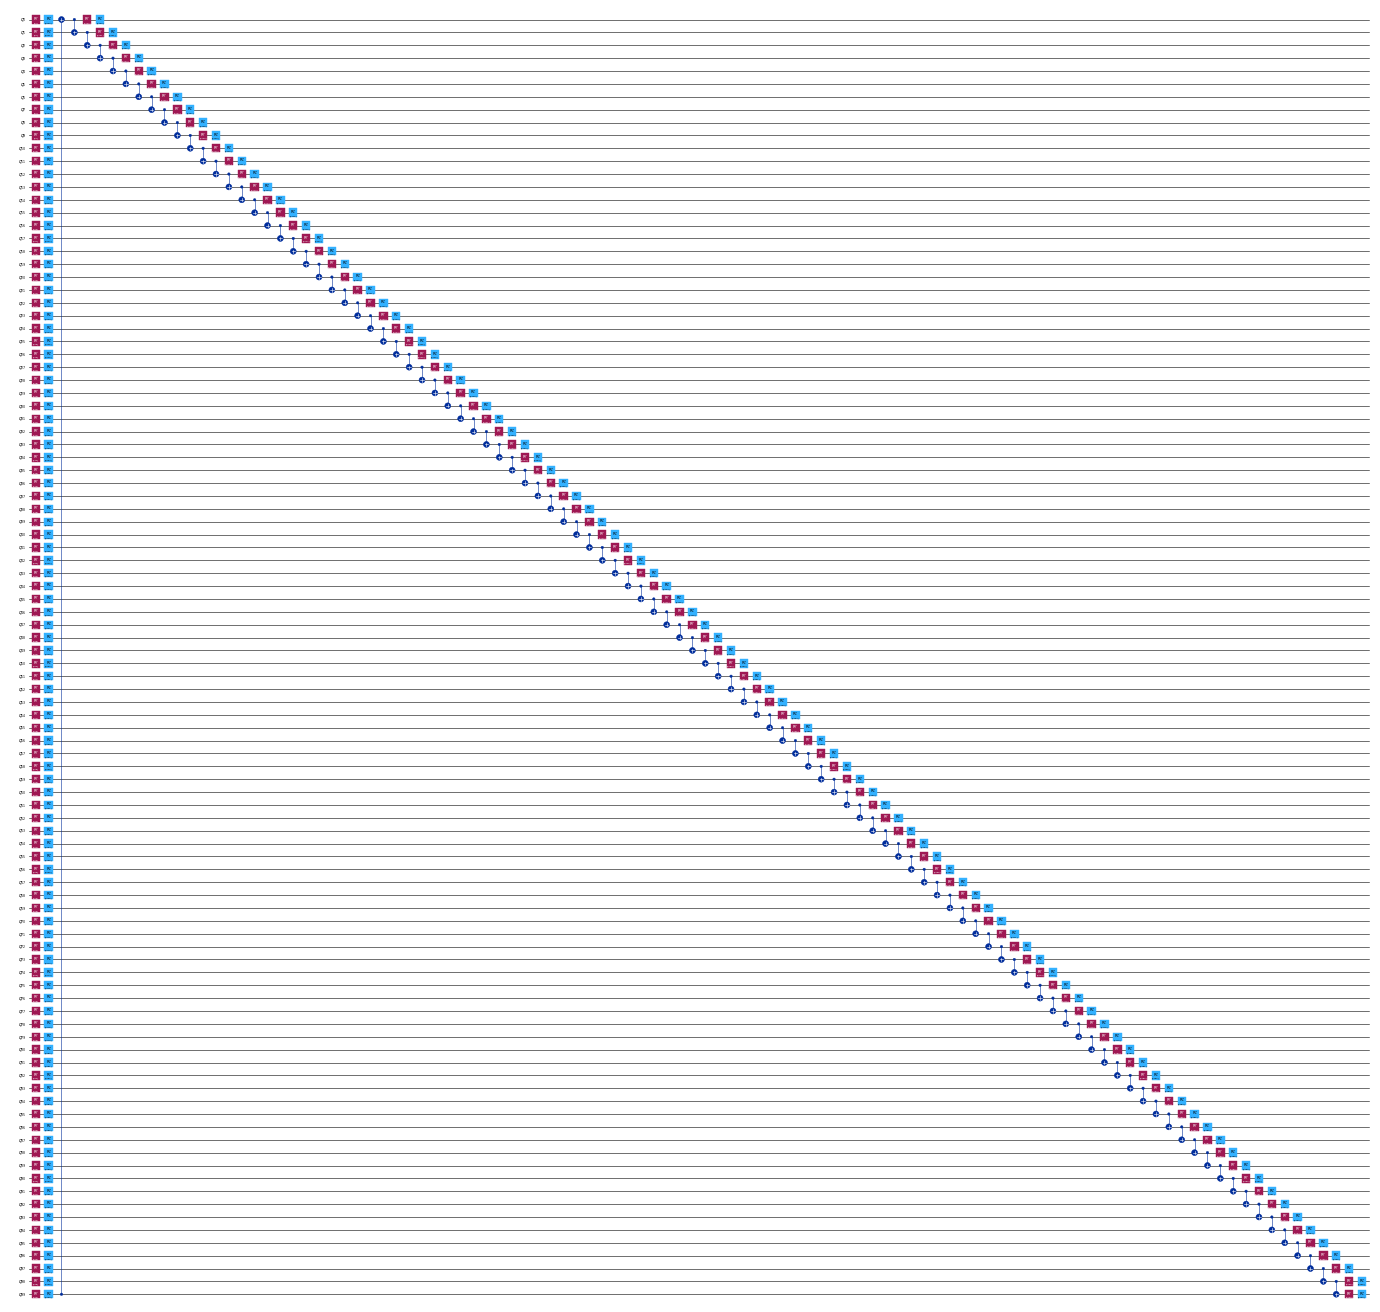

In [3]:
circuit = EfficientSU2(100, entanglement="circular", reps=1).decompose()
print(
    f"Original circuit -> Depth: {circuit.depth()}, Gates(2q): {circuit.num_nonlocal_gates()}"
)
circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

## Step 2: Optimize your circuit

#### With Qiskit AI Transpiler

In [4]:
qiskit_ai_transpiler = PassManager(
    [AIRouting(backend_name="ibm_torino", optimization_level=1, layout_mode="optimize")]
)

In [5]:
ai_transpiled_circuit = qiskit_ai_transpiler.run(circuit)

Qiskit AI Transpiler -> Depth: 104, Gates(2q): 100


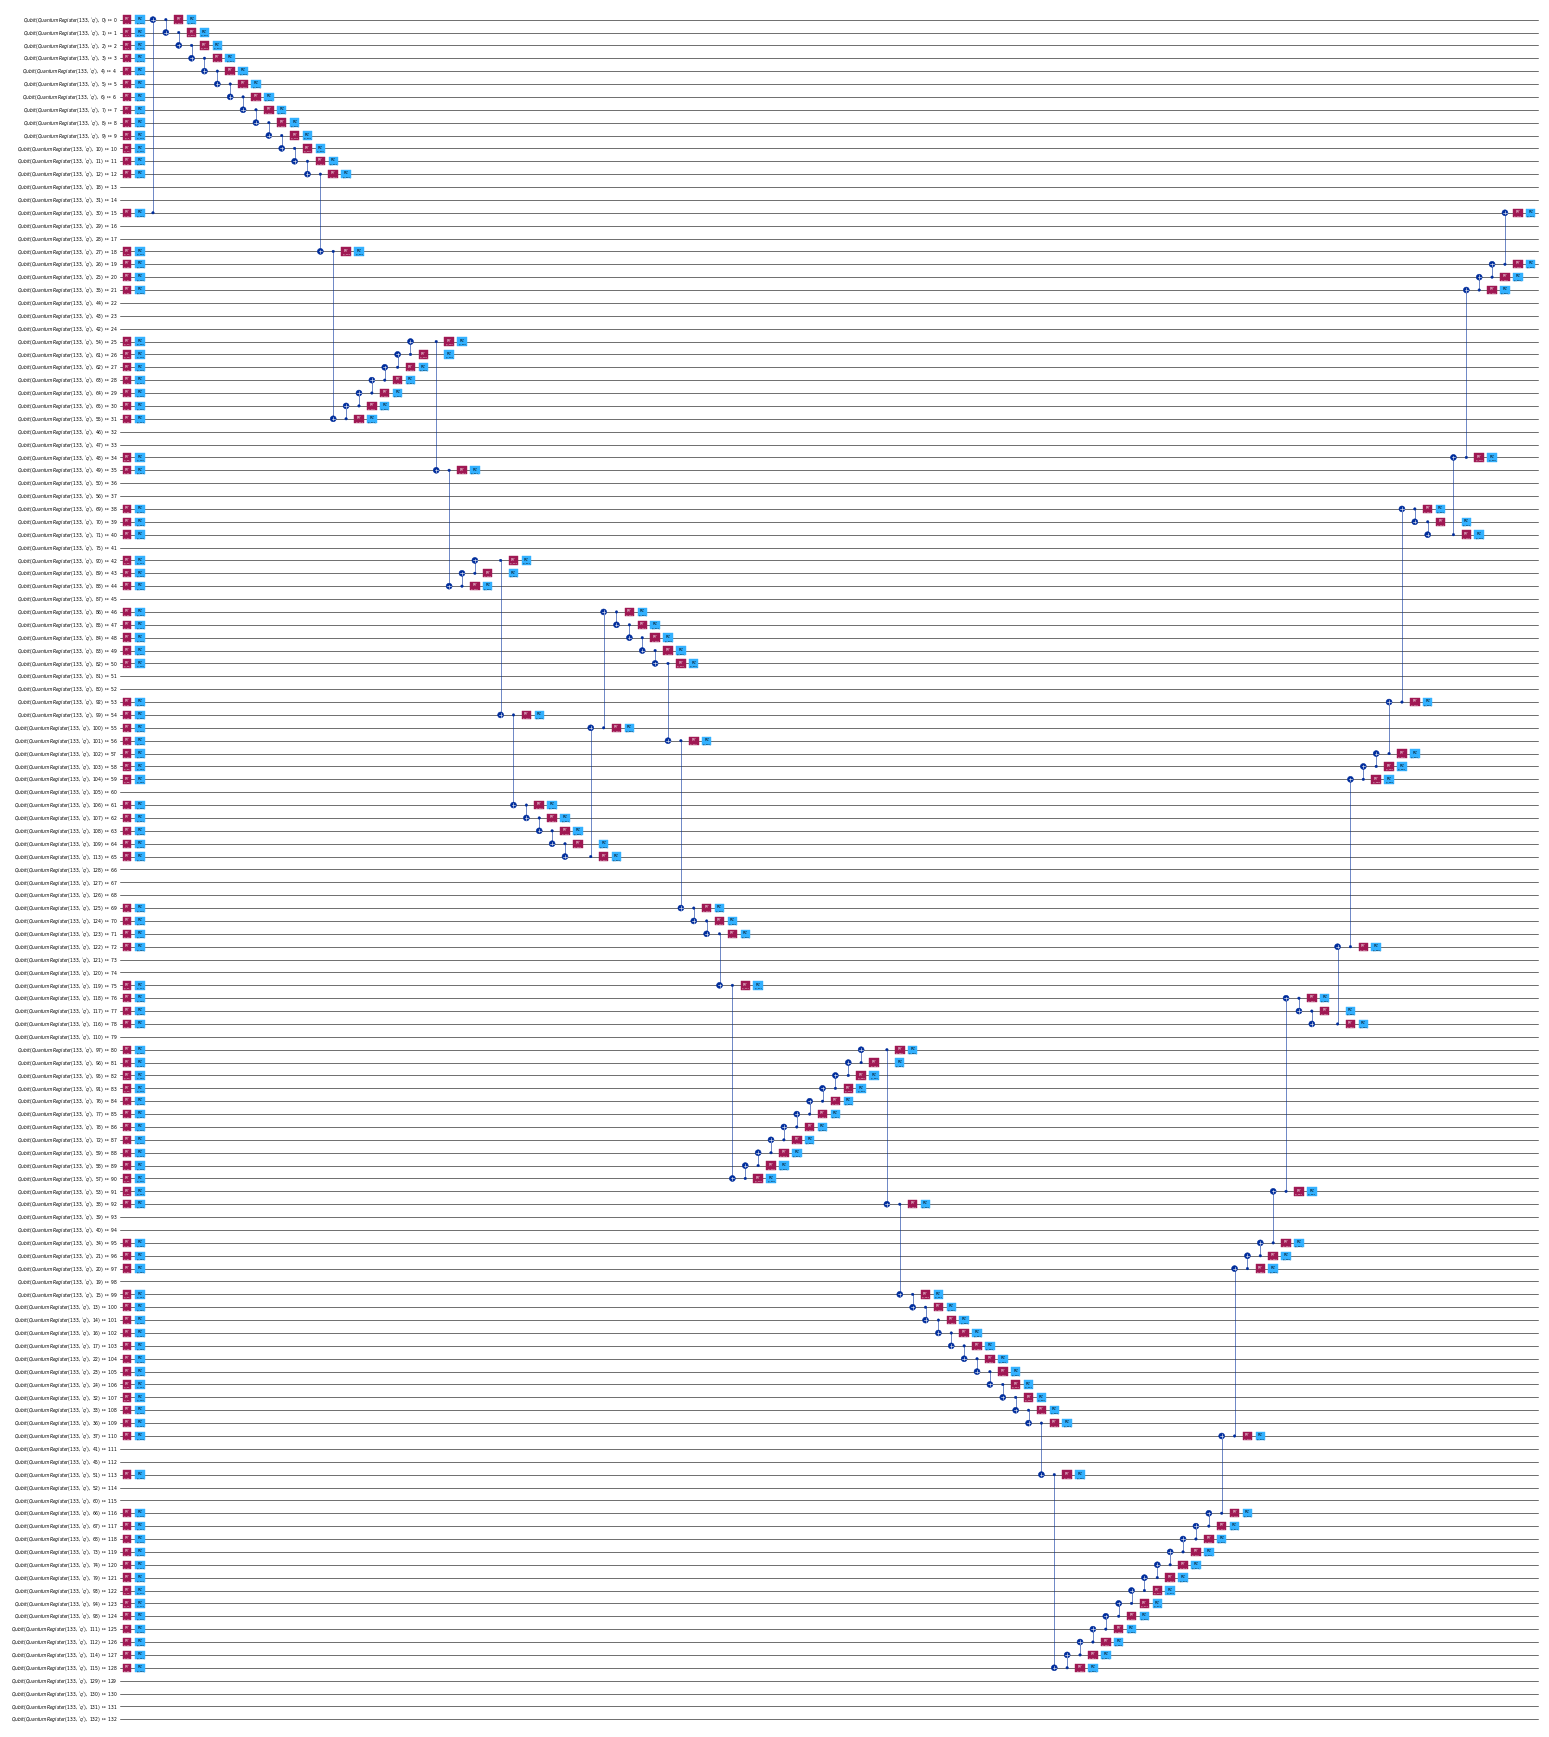

In [6]:
print(
    f"Qiskit AI Transpiler -> Depth: {ai_transpiled_circuit.depth()}, Gates(2q): {ai_transpiled_circuit.num_nonlocal_gates()}"
)
ai_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

#### With Qiskit lvl3 Transpiler (local)

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

coupling_map = QiskitRuntimeService().backend("ibm_torino").coupling_map

In [8]:
qiskit_lvl3_transpiler = generate_preset_pass_manager(
    optimization_level=3, coupling_map=coupling_map
)

In [9]:
lvl3_transpiled_circuit = qiskit_lvl3_transpiler.run(circuit)

Qiskit lvl3 Transpiler -> Depth: 104, Gates(2q): 100


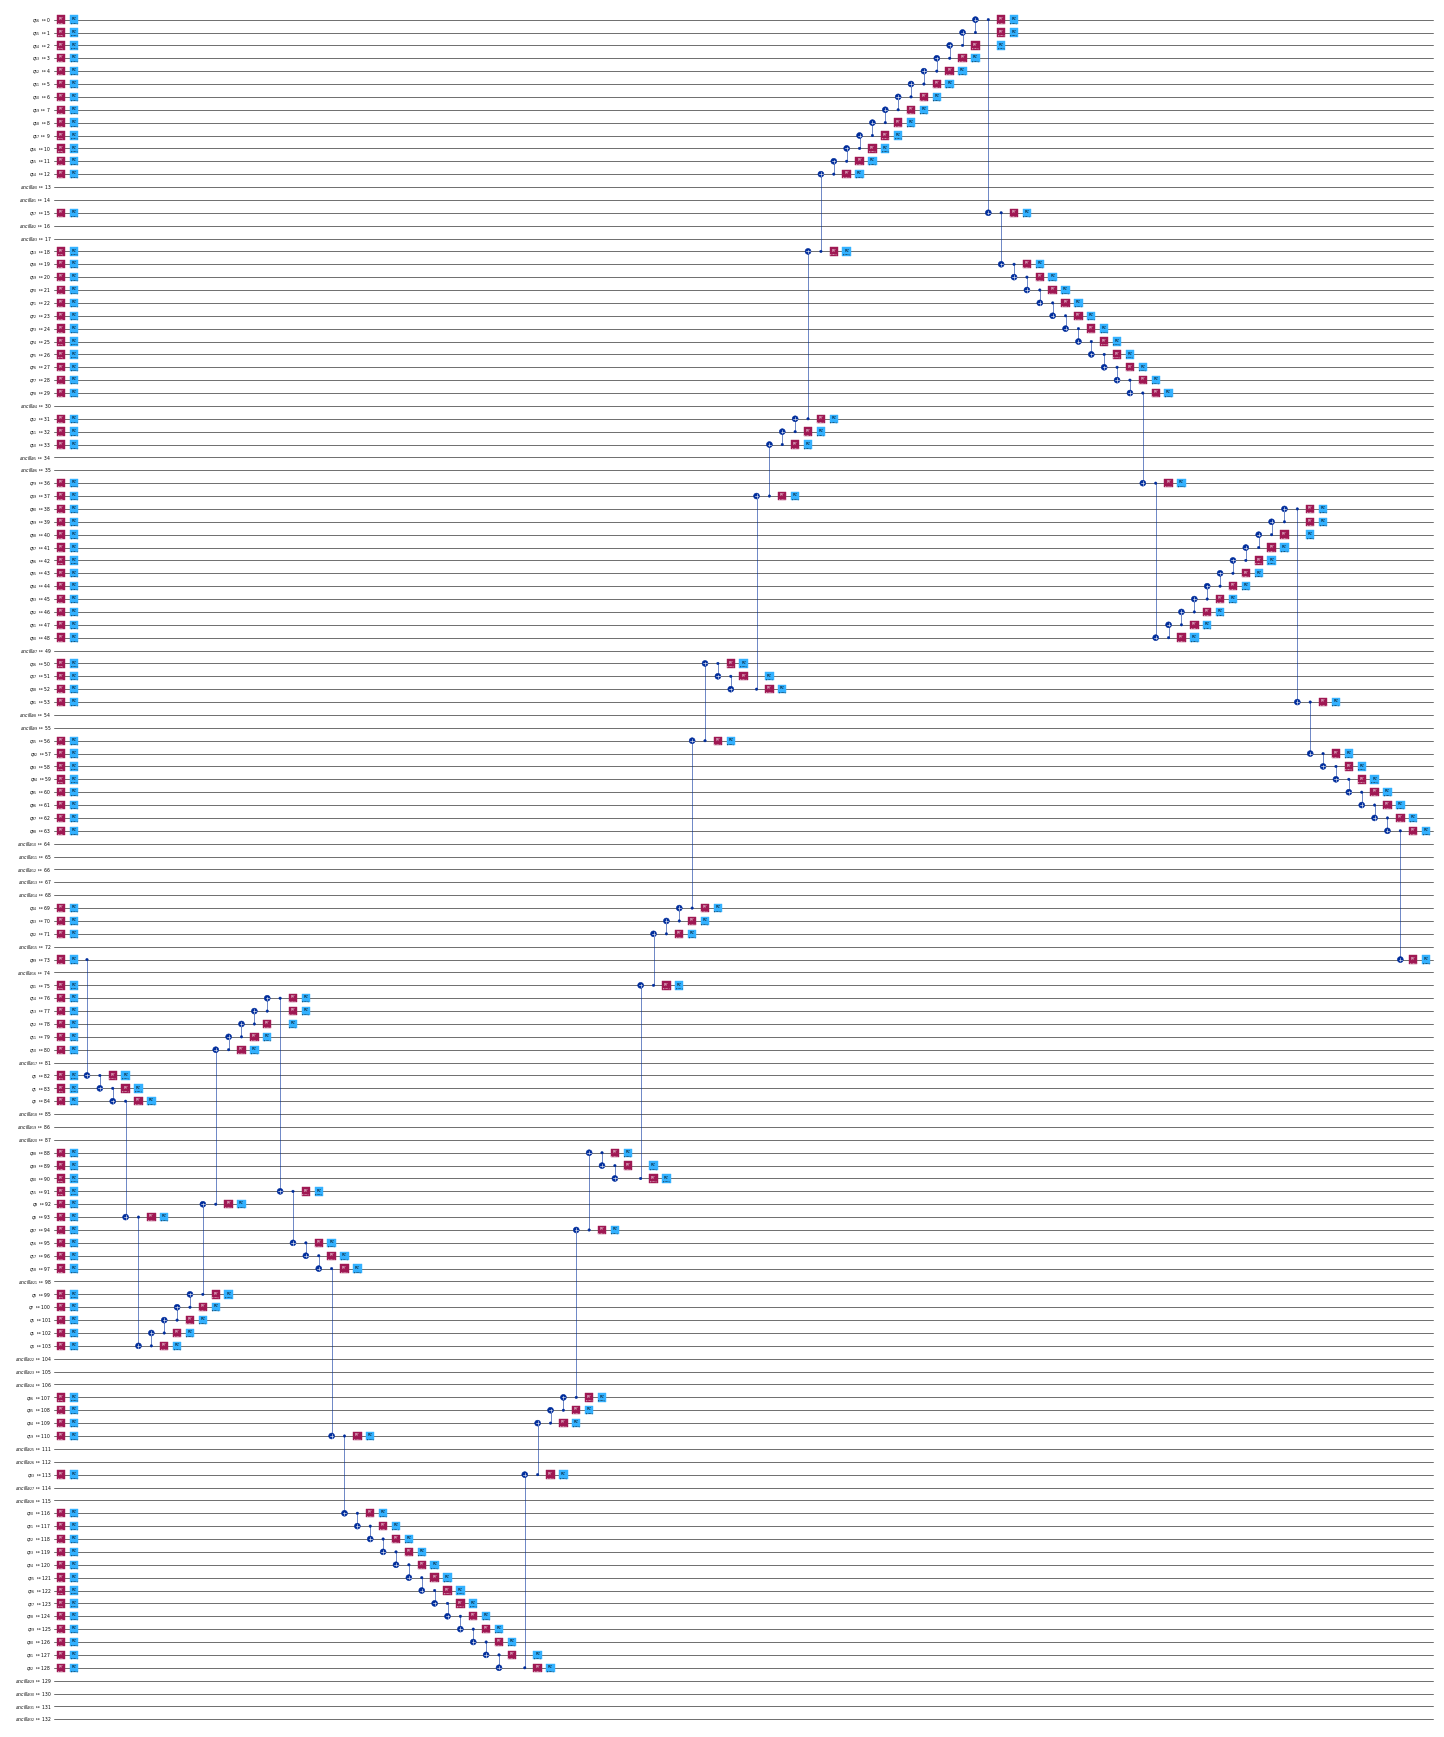

In [10]:
print(
    f"Qiskit lvl3 Transpiler -> Depth: {lvl3_transpiled_circuit.depth()}, Gates(2q): {lvl3_transpiled_circuit.num_nonlocal_gates()}"
)
lvl3_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

#### With Qiskit lvl3 Transpiler (service)

In [11]:
from qiskit_transpiler_service.transpiler_service import TranspilerService

qiskit_lvl3_transpiler_service = TranspilerService(
    backend_name="ibm_torino",
    ai='false',
    optimization_level=3,
)

In [12]:
lvl3_transpiled_circuit_v2 = qiskit_lvl3_transpiler_service.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Qiskit lvl3 Transpiler -> Depth: 312, Gates(2q): 100


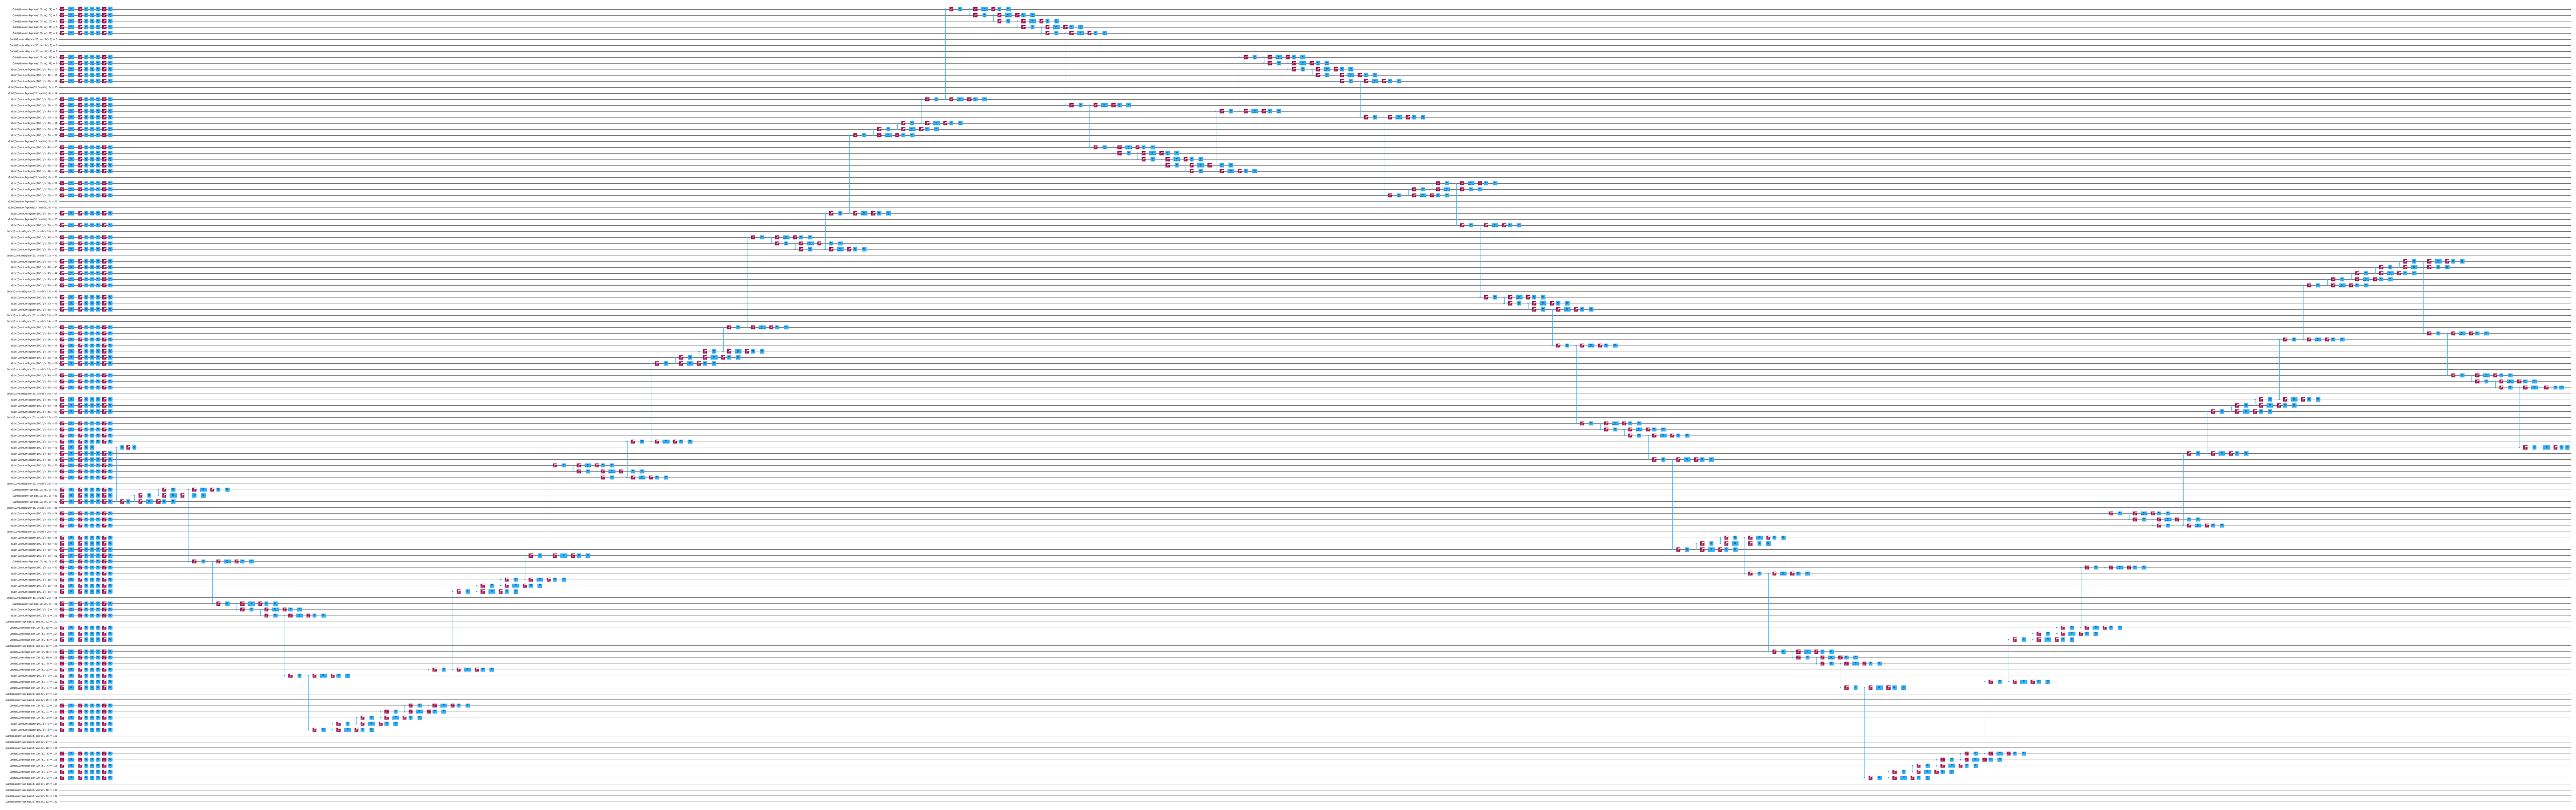

In [13]:
print(
    f"Qiskit lvl3 Transpiler -> Depth: {lvl3_transpiled_circuit_v2.depth()}, Gates(2q): {lvl3_transpiled_circuit_v2.num_nonlocal_gates()}"
)
lvl3_transpiled_circuit_v2.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

#### With Qiskit lvl3 Transpiler (service) with AI

In [15]:
qiskit_lvl3_ai_transpiler_service = TranspilerService(
    backend_name="ibm_torino",
    ai='true',
    optimization_level=3,
)

In [16]:
lvl3_transpiled_ai_circuit_v2 = qiskit_lvl3_ai_transpiler_service.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Qiskit lvl3 AI Transpiler -> Depth: 312, Gates(2q): 100


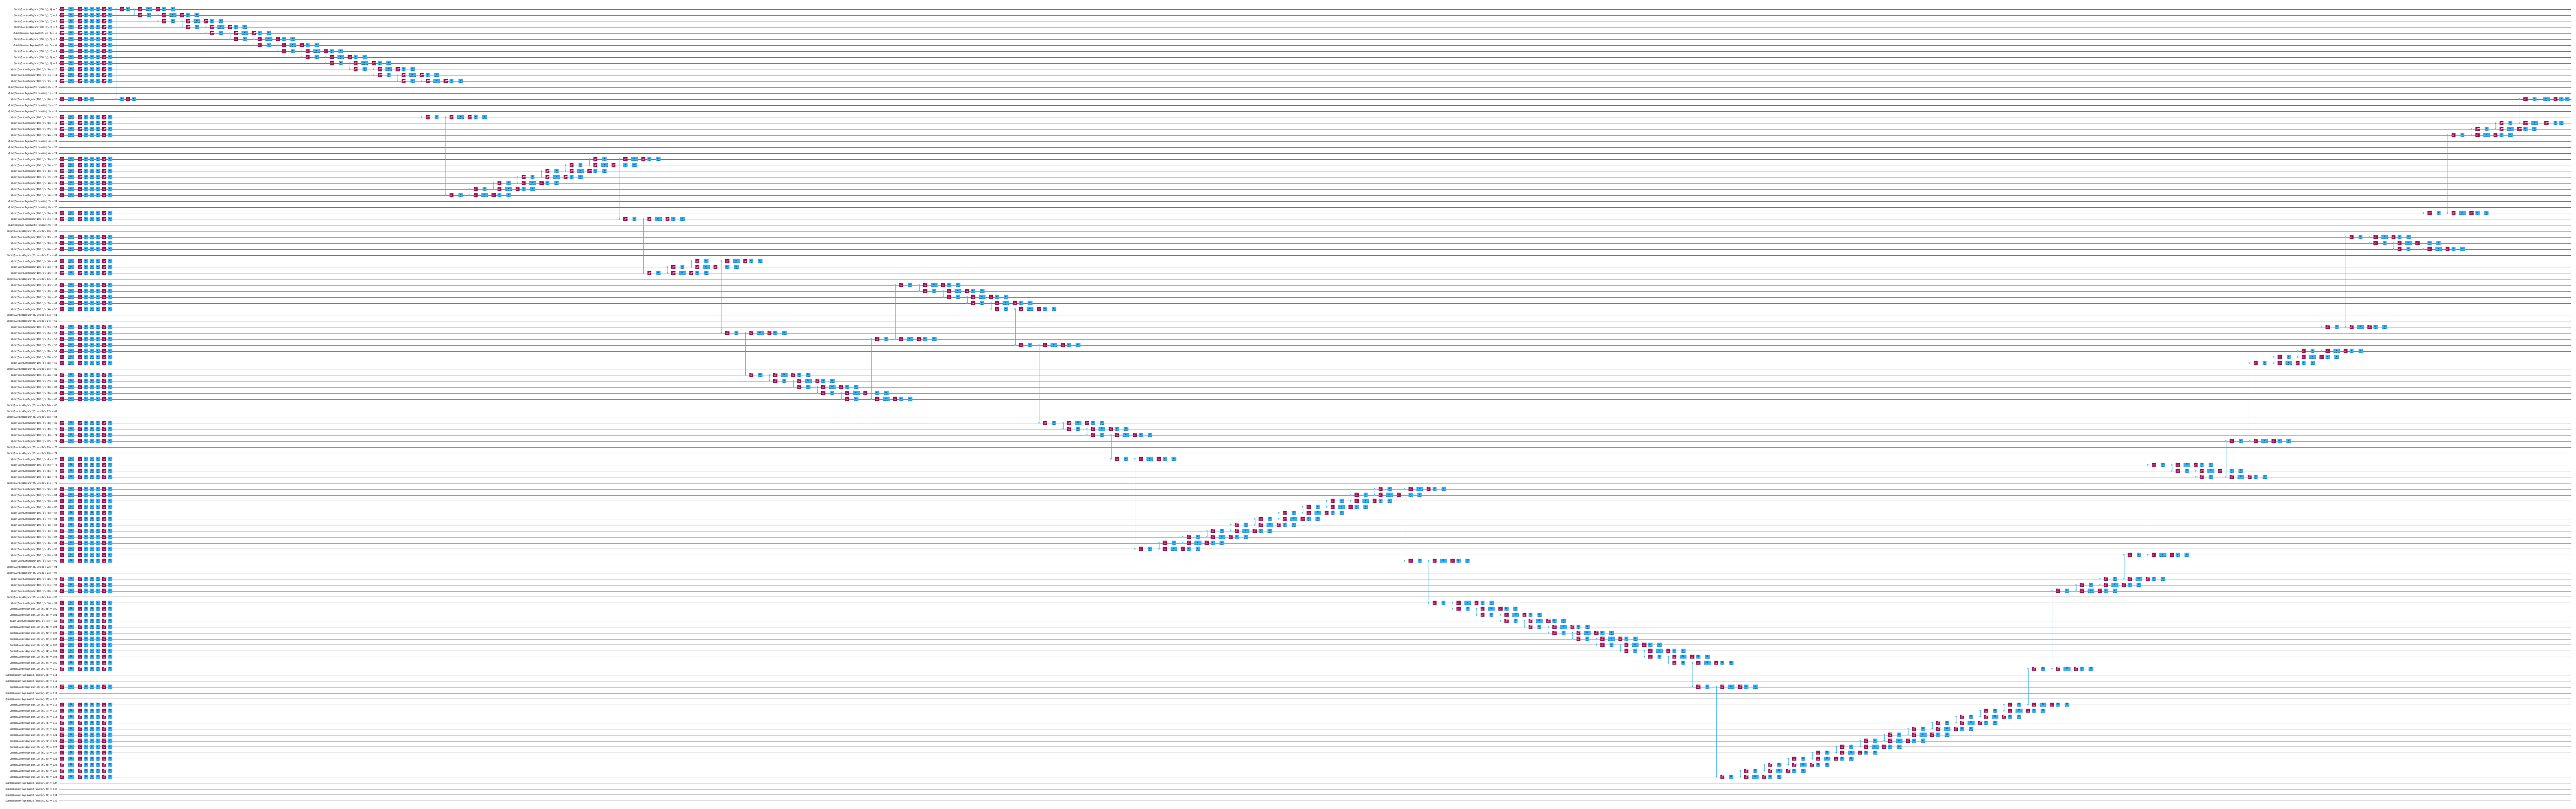

In [17]:
print(
    f"Qiskit lvl3 AI Transpiler -> Depth: {lvl3_transpiled_ai_circuit_v2.depth()}, Gates(2q): {lvl3_transpiled_ai_circuit_v2.num_nonlocal_gates()}"
)
lvl3_transpiled_ai_circuit_v2.draw(output="mpl", fold=-1, scale=0.2, style="iqp")